## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [247]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11,9)})
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [248]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [249]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [250]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [251]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [252]:
df[(df['group'] == 'treatment') != (df['landing_page'] == 'new_page')].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [254]:
df2 = df.drop(df[(df.group == 'treatment') != (df.landing_page == 'new_page')].index)

In [255]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [256]:
df2['user_id'].count(), df2['user_id'].nunique()

(290585, 290584)

b. There is one **user_id** repeated in **df2**.  What is it?

In [257]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [258]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [259]:
df2.drop_duplicates('user_id',inplace = True)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [260]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [261]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [262]:
df2.groupby('group')['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

In [263]:
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [264]:
df2[df2['landing_page'] == 'new_page'].count() / df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**By looking at the conversion rate for new_page and old_page, it doesn't seem obvious that one page leads to more conversion than another. The control group conversion is 12.03% while the treatment group conversion is 11.88%. At first sight, there is no sufficient evidence that could make one asserts that one page leads to more conversion. Further researches have to be done to look for statistical significance.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: convert_{new} - convert_{old} =< 0$$


$$H_1: convert_{new} - convert_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [265]:
p_new = df.converted.mean()
p_new

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [266]:
#Under the null means that there is no difference between p_old and p_new
p_old = p_new
p_old

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [267]:
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [268]:
n_old = df2[df2['group'] == 'control']['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [269]:
new_page_converted = np.random.binomial(1, p_new, n_new)
np.mean(new_page_converted)

0.11941366733191108

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [270]:
old_page_converted = np.random.binomial(1, p_old, n_old)
np.mean(old_page_converted)

0.12063411209163374

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [271]:
diffs = np.mean(new_page_converted) - np.mean(old_page_converted)
diffs

-0.0012204447597226609

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [272]:
p_diffs, old_page, new_page = [], [], []

for _ in range(10000):
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_converted = np.random.binomial(1, p_new, n_new)
    diffs = np.mean(new_page_converted) - np.mean(old_page_converted)
    p_diffs.append(diffs)
    old_page.append(np.mean(old_page_converted))
    new_page.append(np.mean(new_page_converted))
    

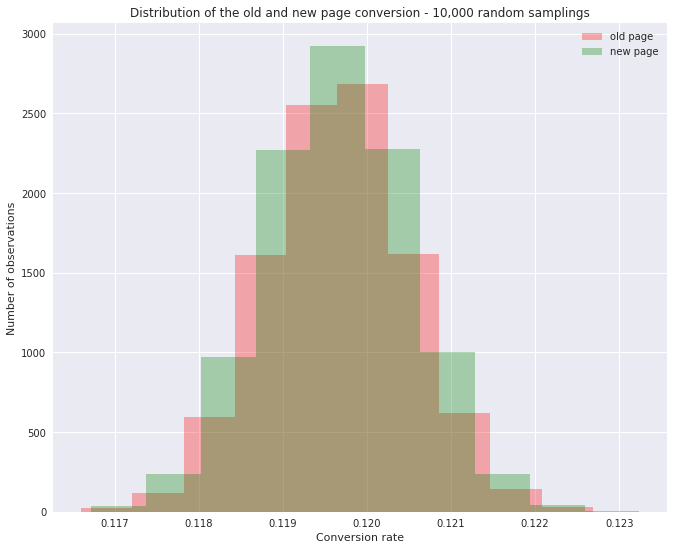

In [273]:
plt.hist(old_page, alpha=0.3, color='red', label='old page')
plt.hist(new_page, alpha=0.3, color= 'green', label='new page')
plt.ylabel('Number of observations')
plt.xlabel('Conversion rate')
plt.legend(loc="upper right")
plt.title('Distribution of the old and new page conversion - 10,000 random samplings');

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

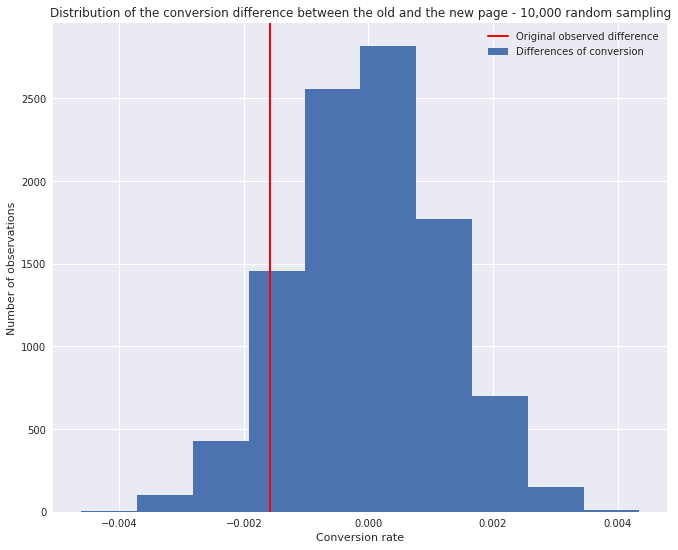

In [274]:
plt.hist(p_diffs, label='Differences of conversion')
plt.axvline(x=obs_diff, color='red', linewidth=2, label='Original observed difference')
plt.ylabel('Number of observations')
plt.xlabel('Conversion rate')
plt.legend(loc="upper right")
plt.title('Distribution of the conversion difference between the old and the new page - 10,000 random sampling');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [275]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.9042

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**P_value. Our p_value is above 0.05, therefore we fail to reject the null hypothesis and we can conclude that there is no statistical difference in conversion between the old and the new pages. The new page statistically  doesn't prove to convert better than the old one.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [276]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2[df2['group'] == 'control']['converted'].sum()
convert_new = df2[df2['group'] == 'treatment']['converted'].sum()
n_old = df2[df2['group'] == 'control']['user_id'].count()
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
p_difference = convert_new - convert_old

In [277]:
convert_new, n_new,convert_old, n_old

(17264, 145310, 17489, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [278]:
z, pvalue = sm.stats.proportions_ztest(count = [convert_old, convert_new], nobs= [n_old, n_new], alternative='smaller')
print('z-score is {0} and p_value is {1}'.format(z, pvalue))

z-score is 1.3109241984234394 and p_value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**By computing the p_value with another method (using z-test),the p_value follows closely what has been found in the previous question. Therefore, I re-assert that we failed to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Our results to predict are categorical, therefore the Logistic regression should be used in this case.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [279]:
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [280]:
df2['ab_page'] = df['group'].apply(lambda x: 1 if x == 'treatment' else 0)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [281]:
lr_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lr_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [282]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-31 10:36 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p_value associated with the ab_page variable in our logistic regression analysis is 0.1899. This p_value is substantially lower than the one found in our hypothesis testing in Part II, although it is still above 0.05. The p_value above 0.05 tells us that the null hypothesis of the logistic regression (that there is no difference between our categorical values 1 and 0 here) is not rejected. This conclusion is aligned with the ones we made prior to this logistic regression analysis. We can see the 2.5 percentile is -.0374 and the 97.5 percentile is 0.0074, which means that the value is going through 0. And a coefficient of 0 for ab_page would mean that this variable is of no use.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Various elements could make one converts. With the data presently available in our dataset it could be interesting to see if some day (day of the week) and time are more prone to make one converts.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [283]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [284]:
#Using merge could have been an option too: new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

df = df2.set_index('user_id').join(df_countries.set_index('user_id'))
df.reset_index(inplace=True)
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [285]:
print(df.groupby('country')['converted'].mean(), df.groupby(['country', 'group'])['converted'].mean())

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64 country  group    
CA       control      0.118783
         treatment    0.111902
UK       control      0.120022
         treatment    0.121171
US       control      0.120630
         treatment    0.118466
Name: converted, dtype: float64


**The UK seems to have the highest conversion rate, which is substantially higher than the one in Canada for example. The conversion rate of the US follows one of the UK relatively closely.**

**The old page seems to work better than the new one in North America whereas the new page has a better rate in the UK.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [286]:
df['intercept'] = 1
df.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US


In [287]:
df[['CA', 'UK', 'US']] = pd.get_dummies(df['country'])
df.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1


In [288]:
df.drop(['CA'], axis=1, inplace= True)
df.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1


In [289]:
y = df['converted']
X = df[['intercept', 'ab_page', 'UK', 'US']]

lr_model2 = sm.Logit(y, X)
results2 = lr_model2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-31 10:36 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [290]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [291]:
df2['hours'] = df2['timestamp'].str[11:].str[:2].astype(float)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,hours
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,22.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,8.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,16.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,18.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1.0


In [292]:
df2.describe()

,user_id,converted,intercept,ab_page,hours
count,290584.000000,290584.000000,290584.0,290584.000000,290584.000000
mean,788004.876222,0.119597,1.0,0.500062,11.506387
std,91224.735468,0.324490,0.0,0.500001,6.919702
min,630000.000000,0.000000,1.0,0.000000,0.000000
25%,709034.750000,0.000000,1.0,0.000000,6.000000
50%,787995.500000,0.000000,1.0,1.000000,12.000000
75%,866956.250000,0.000000,1.0,1.000000,17.250000
max,945999.000000,1.000000,1.0,1.000000,23.000000


In [293]:
#let's explore the hours a bit more by cutting the group into bins
print('The bins are created, using the statistics data above:')
bin_edges= [0, 6, 12, 17, 23]
bin_edges

The bins are created, using the statistics data above:


[0, 6, 12, 17, 23]

In [294]:
print('We are giving names to these groups:')
bin_names = ['Night', 'Morning', 'Afternoon', 'Evening']
bin_names

We are giving names to these groups:


['Night', 'Morning', 'Afternoon', 'Evening']

In [295]:
#We are using pandas's cut function to execute the storing of hours data in our four groups
df2['hours_group']=pd.cut(df2['hours'], bin_edges, labels=bin_names)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,hours,hours_group
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,22.0,Evening
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,8.0,Morning
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,16.0,Afternoon
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,18.0,Evening
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1.0,Night


In [296]:
print('The mornings and evenings seem to be times of the day where customers convert the most regardless of the pages:')
df2.groupby('hours_group')['converted'].mean()

The mornings and evenings seem to be times of the day where customers convert the most regardless of the pages:


hours_group
Night        0.116408
Morning      0.120914
Afternoon    0.119874
Evening      0.121122
Name: converted, dtype: float64

In [297]:
#Let's now prepare our dataset for running a logistic regression analysis with our new variables: the hours!
df2[['Night', 'Morning', 'Afternoon', 'Evening']] = pd.get_dummies(df2['hours_group'])
df2.drop(['Night'], axis=1, inplace= True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,hours,hours_group,Morning,Afternoon,Evening
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,22.0,Evening,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,8.0,Morning,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,16.0,Afternoon,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,18.0,Evening,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1.0,Night,0,0,0


In [298]:
y = df2['converted']
X = df2[['intercept', 'ab_page', 'Morning', 'Afternoon', 'Evening']]

lr_model3 = sm.Logit(y, X)
results3 = lr_model3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366104
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-31 10:36 AIC:              212777.9010
No. Observations:   290584           BIC:              212830.7993
Df Model:           4                Log-Likelihood:   -1.0638e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0141    0.0121  -166.2546  0.0000  -2.0378  -1.9903
ab_page      -0.0149    0.0114    -1.3070  0.1912  -0.0374   0.0075
Morning       0.0377    0.0156     2.4154  0.0157   0.0071   0.0683
Afternoon     0.0279    0.0165     1.6976  0.0896  -0.0043   0.0602
Evening       0.0396    0.0156     2.5394  0.0111   0.0090   0.0702
==================================================================

"""

**At first sight we can see that the mornings and the evening seems to be drivers for conversion than Afternoon and Night. In addition, they both have a statistical significance observable by looking at their p_values.**

**To sum up, I wouldn't recommend this e-commerce website to change their landing page. The variety of analytical tools we have used didn't show any noticeable statistical significance in favor of the new page, while practically it would be inefficient for the company to work on its implementation.**

**Although, we have seen in the last logistic regression analysis that the time of the day seems to be, statistically, a good driver of our conversion rate. Customers in the morning and evening tend to be on the website for shopping while for other time slots it is more for gleaning!**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])